In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

#### Este conjunto de datos contiene la cantidad de publicidad gastada en TV, Radio y periodico. En base a esa publicidad tenemos las ventas obtenidos.
#### OBJETIVO: Descubrir cuales son los medios de publicidad que mas ventas producen
+ Se cargan los datos que se van a utilizar.

In [2]:
data = pd.read_csv("dataSets/advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


+ con el siguiente comando de codigo mostrarenos las columnas de nuestro conjunto de datos que vamos a utilizar, en este caso vamos a mostrar todas las columnas menos _***"unnamed: 0."***_. 

In [3]:
data = data.iloc[:, 1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


+ Se muestra la informacion del conjunto de datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Con el siguiente comando de codigo se obtiene el resumen de todos los datos numericos del conjunto de datos.

+ _***Count***_ = numero de filas del conjunto de datos.
+ _***Mean***_ = Promedio de filas del conjunto de datos.
+ _***Min***_ = Valor minimo del conjunto de datos.
+ _***25%***_ = Muestra los datos que se encuentran bajo el 25% de los datos.
+ _***50%***_ = Mediana del conjunto de datos.
+ _***75%***_ = Muestra los datos que se encuentran bajo el 75% de los datos.
+ _***Max***_ = Valor maximo del conjunto de datos.

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#### La mejor forma de conocer un conjunto de datos es crear una visualizacion para poder ver como estan distribuidos los datos.
+ Se grafican las variables independientes (TV, RAdio, Newspaper).

### _***1. REGRESION LINEAL SIMPLE***_

+ Para mostrar las visualizaciones de las columnas respecto a las ventas, se hace un _***ciclo for***_ que me iterara la cantidad de columnas y posteriormente se mostraran las visualizaciones correspondientes por cada columna con respecto a las ventas obtenidas por cada tipo de publicidad.

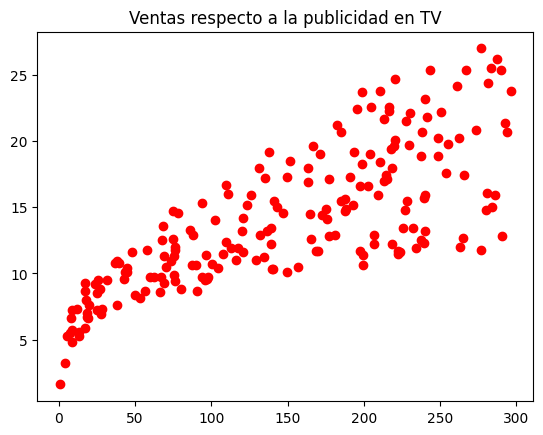

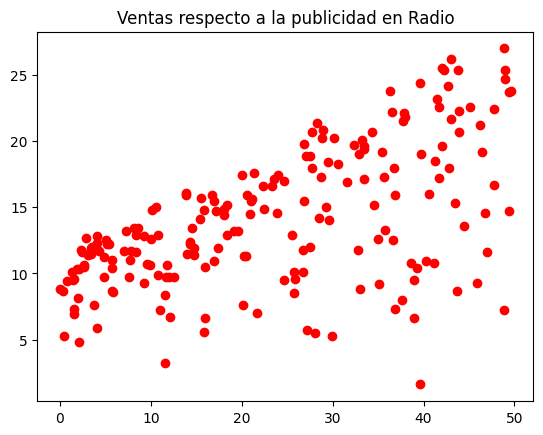

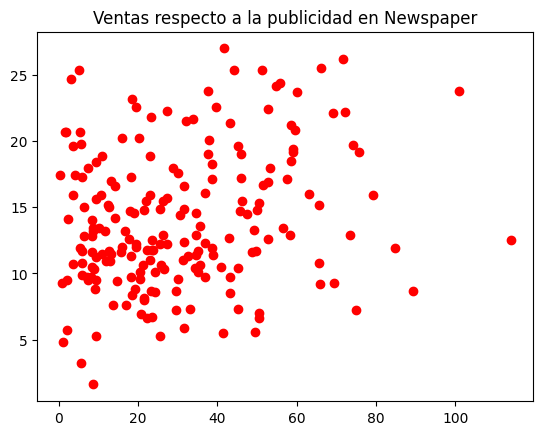

In [7]:
cols = ['TV', 'Radio', 'Newspaper']
for col in cols:
    plt.plot(data[col], data['Sales'], 'ro')
    plt.title('Ventas respecto a la publicidad en %s' % col)
    plt.show()

+ Separamos la variable independiente _***'X'***_ y la variable independiente _***'Y'***_
+ El metodo reshape(-1, 1) envia una matriz de datos para hacer las predicciones requeridas si no se le coloca esta metodo envia los datos como un objeto y no se podran hacer las predicciones.

In [8]:
x = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values

#### Dividir el conjunto de datos entre entrenamiento y test.
+ Se crean las variables de entrenamiento y test.
+ Se asignan los porcentajes de datos a cada variable.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

+ Los siguientes print nos muestran el porcentaje de los datos de cada variable 80% de los datos para el entrenamiento del algoritmo y el 20% restante para el testeo del mismo.

In [10]:
print(x_train.shape)
print(x_test.shape)

(160, 1)
(40, 1)


#### Entrenamiento del algoritmo de regresion lineal simple.
+ Se crea una instancia de linear regresion.
+ Se le pasan ñas variables de entrenamineto tanto de _***'X'***_ como de _***'Y'***_ para crear el modelo de regresion lineal.

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

+ Se predicen los valores.

In [12]:
y_pred = lin_reg.predict(x_test)

+ Se califica el modelo enviandole lops datos de la prediccion y los datos reales.

In [13]:
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3]


#### Se puede observar que el modelo no es muy bueno, ya que en los valores de las predicciones contra los valores reales se nota una gran diferencia. Por lo tanto debemos calificar el modelo de una mejor forma para esto usamos el _***RMSE***_ y la _***R2***_.

In [14]:
rmse =  root_mean_squared_error(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2_score(y_test, y_pred))

RMSE:  3.194472431998898
R2:  0.6766954295627076


+ RMSE: Es una variable de calificacion de modelo que se basa en el conjunto de datos original y este se tiene que acercar al valor minimo de las ventas del conjunto de datos original.
+ R2: Tiene valores solo de 0 a 1, 1 siendo la mejor calificacion y 0 siendo la peor. Entre mas se acerque a 1 el valor numerico que contiene la variable _***R2***_ mejor sera el modelo de regresion lineal.

#### Se grafica el modelo de regresion lineal.

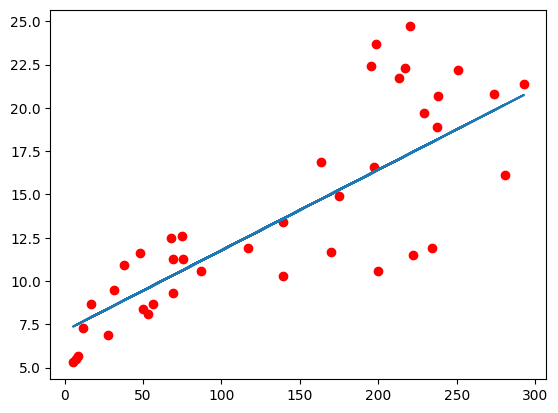

In [15]:
plt.plot(x_test, y_test, 'ro')
plt.plot(x_test, y_pred)
plt.show()

+ Se puede observar que el modelo tiene datos de testing muy alejados del modelo lo que hace que la calificacion del modelo de _***TV***_ sea muy baja.

#### Se debe ensayar la prediccion con otro modelo para tener una mejor prediccion de estos datos.

+ Se crea la funcion _***modelos_simples***_ que me graficara cada uno de los modelos, y para esto basta con pasarle por parametro el nombre de la variable independiente que deseamos graficar.

+ _***NOTA:***_ Es el mismo proceso anterior, simplemente se hace la funcion para pasarle la variable independiente por parametro y asi visualizar todas las predicciones solo invocando la funcion _***modelos_simples***_

In [16]:
def modelos_simples(independiente):
    x = data[independiente].values.reshape(-1, 1)
    y = data['Sales'].values
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    y_pred = lin_reg.predict(x_test)
    print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))
    rmse =  root_mean_squared_error(y_test, y_pred)
    print('RMSE: ', rmse)
    print('R2: ', r2_score(y_test, y_pred))
    
    plt.plot(x_test, y_test, 'ro')
    plt.plot(x_test, y_pred)
    plt.show()

+ Se invoca la funcion con la variable independiente _***Radio***_

Predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], Reales: [16.9 22.4 21.4  7.3]
RMSE:  4.8216974799471926
R2:  0.2634309396999791


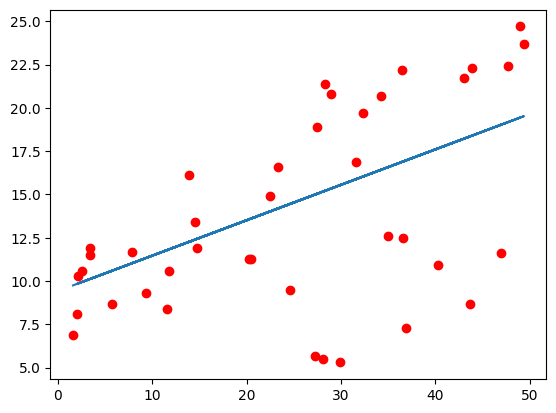

In [17]:
modelos_simples('Radio')

+ Se puede observar que el modelo de _***Radio***_ es peor que el de _***TV***_, por lo que se puede analizar que se han efectuado mas ventas en la publicidad hecha por television que por la publicidad hecha por la Radio.

+ Se invoca la funcion _***Modelos_simples***_ con la variable independiente _***Newspaper***_ ('Periodico')

Predicciones: [15.47167765 15.47167765 14.89203768 15.01155108], Reales: [16.9 22.4 21.4  7.3]
RMSE:  5.533600454969853
R2:  0.029871749149522397


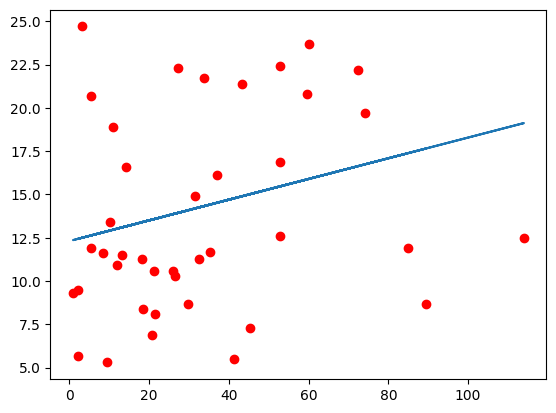

In [18]:
modelos_simples('Newspaper')

+ Se puede observar que el modelo de _***Newspaper***_ es el peor de los 3 modelos vistos anteriormente concluyendo que la publicidad en periodico no beneficia las ventas de la empresa.

#### En conclusion el medio de publicidad que mas genera ventas para la empresa es la television, La radio es el segundo medio que mas genera ventas y el periodico es el tercero. Por lo que definitivamente hay que eliminar el metodo de publicidad por periodico ya que son practicamente nulos los ingresos por este medio de comunicacion.

+ _***NOTA:***_ Hay que tener en cuenta que para hacer estas predicciones estamos usando solamente la regresion lineal simple, pero podemos agrupar la publicidad de _***TV***_ y _***Radio***_ para hacer la prediccion de las ventas, y asi este modelo podria predecir de una mejor manera cuantas ventas obtendriamos en base a la publicidad gastada en cada uno de ellos.

### _***2. REGRESION LINEAL MULTIPLE***_

#### Se hacen las predicciones con las variables dependientes television y Newspaper

+ Eliminamos las columnas _***Radio***_ y _***Sales***_ ya que solo vamos a visualizar las variables independientes _***TV***_ y _***Newespaper***_

Predicciones: [16.00205249 17.4873792  21.45480309  8.555338  ], Reales: [16.9 22.4 21.4  7.3]
RMSE:  3.3260422878644853
R2:  0.649515280538585


<Axes: >

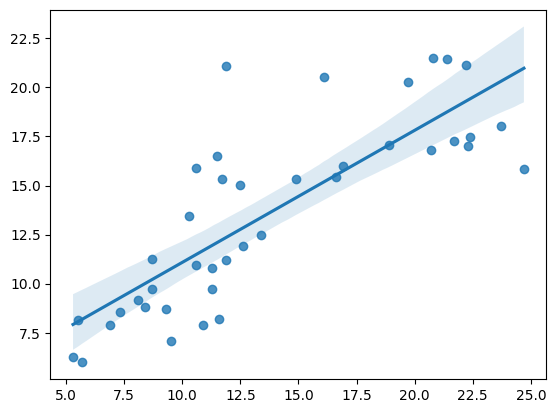

In [19]:
x = data.drop(['Radio', 'Sales'], axis=1).values
y = data['Sales'].values
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

rmse =  root_mean_squared_error(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2_score(y_test, y_pred))
    
sns.regplot(x = y_test, y= y_pred)

+ Lo que podemos observar en la visualizacion del modelo es que el periodico perjudica mucho a las ventas relaizadas con la publicidad en la television, por lo que esta combinacion es muy mala. afectando las ventas de la empresa.

#### Se hacen las predicciones con las variables dependientes television y radio

+ Eliminamos las columnas _***Newspaper***_ y _***Sales***_ ya que solo vamos a visualizar las variables independientes _***TV***_ y _***Radio***_

Predicciones: [16.35747252 20.86299397 21.52505848 10.58719845], Reales: [16.9 22.4 21.4  7.3]
RMSE:  1.7714254173033515
R2:  0.9005833101920356


<Axes: >

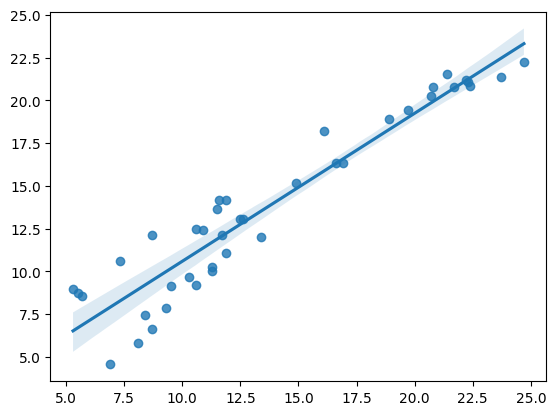

In [20]:
x = data.drop(['Newspaper', 'Sales'], axis=1).values
y = data['Sales'].values
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

rmse =  root_mean_squared_error(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2_score(y_test, y_pred))
    
sns.regplot(x = y_test, y= y_pred)

+ Lo que podemos observar en la visualizacion del modelo es que la combinacion de television con radio es la mejor que podemos obtener para predecir las ventas de la empresa, ya que se obtiene un 90% de producccion en las ventas hechas con publicidad en ambos medios de comunicacion.

### _***3. REGRESION POLINOMICA***_